# 🚢 Dataviz with Titanic dataset

## 🚚 Import packages and data

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

df_titanic_raw = sns.load_dataset('titanic')
df_titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## ⚙️ Data process

In [41]:
# Keeping only necessessary columns

df_test_test_test_test_test_test_test_test_test_test_test_test_titanic = df_titanic_raw.copy()
df_titanic = df_titanic[[
    'who',
    'age',
    'class',
    'embark_town',
    'alive',
    'alone'
]]

# Formatting columns name

df_titanic = df_titanic.rename(columns={
    'who' : 'gender',
    'embark_town' : 'city'
})

df_titanic.columns = df_titanic.columns.str.title()

# Remove null values to have a proper dataset
df_titanic = df_titanic.dropna()

df_titanic['Age'] = df_titanic['Age'].astype('int64')
df_titanic['Alone'] = np.where(df_titanic['Alone'] == True, 'yes', 'no')

df_titanic.head(15)

,Gender,Age,Class,City,Alive,Alone
0,man,22,Third,Southampton,no,no
1,woman,38,First,Cherbourg,yes,no
2,woman,26,Third,Southampton,yes,yes
3,woman,35,First,Southampton,yes,no
4,man,35,Third,Southampton,no,yes
6,man,54,First,Southampton,no,yes
7,child,2,Third,Southampton,no,no
8,woman,27,Third,Southampton,yes,no
9,child,14,Second,Cherbourg,yes,no
10,child,4,Third,Southampton,yes,no


## 🎨 Data visualization

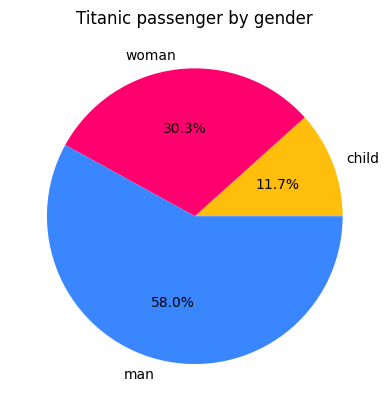

In [92]:
fig, ax = plt.subplots()

ax.pie(
    df_titanic['Gender'].value_counts().sort_values().values,
    labels = df_titanic['Gender'].value_counts().sort_values().index,
    colors=['#ffbe0b', '#ff006e', '#3a86ff'],
    autopct='%1.1f%%'
)

plt.title('Titanic passenger by gender')

plt.show()

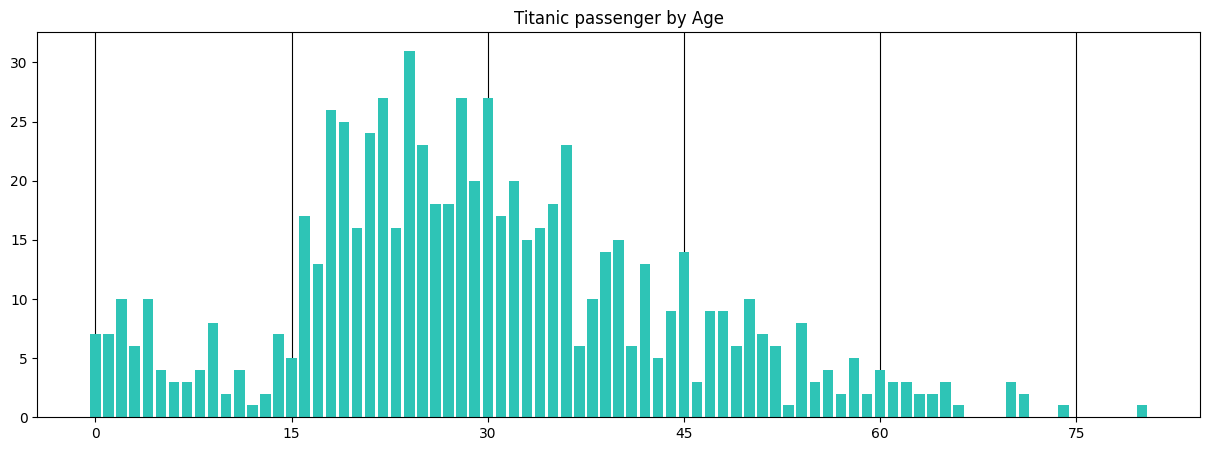

In [120]:
fig, ax = plt.subplots(figsize=(15, 5))

p1 = ax.bar(
    df_titanic['Age'].value_counts().sort_index().index,
    df_titanic['Age'].value_counts().sort_index().values,
    color = '#2ec4b6'
)

x_max = df_titanic['Age'].value_counts().index.max()
ax.set(xticks=np.arange(0, x_max, 15))
ax.grid(axis='x', color = '#000000')
ax.set_axisbelow(True)

plt.title('Titanic passenger by Age')

plt.show()

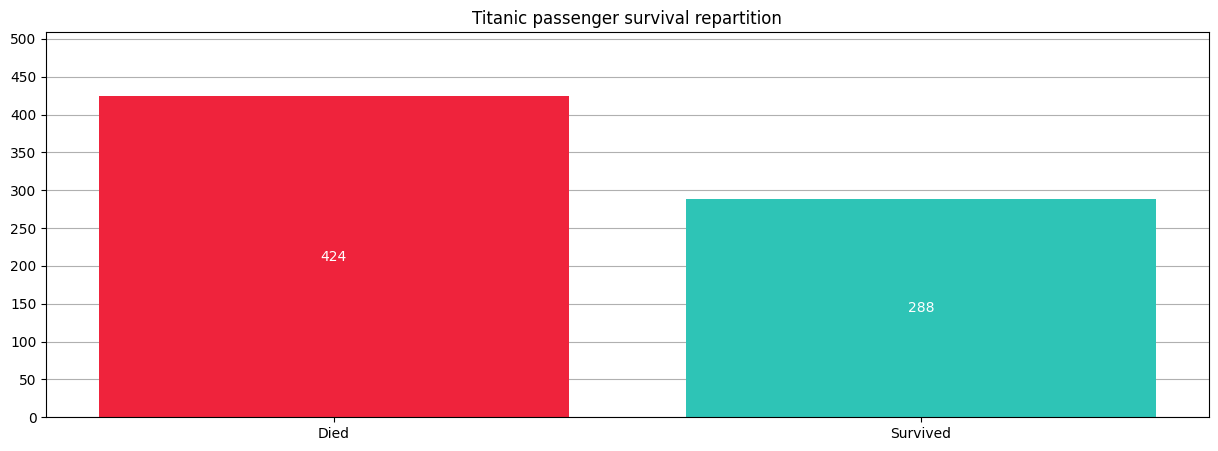

In [131]:
fig, ax = plt.subplots(figsize=(15, 5))

p1 = ax.bar(
    (df_titanic['Alive'].value_counts().sort_values(ascending=False).index).map(mapper={'no' : 'Died', 'yes' : 'Survived'}),
    df_titanic['Alive'].value_counts().sort_values(ascending=False).values,
    color = ['#2ec4b6' if x == 'yes' else '#ef233c' for x in df_titanic['Alive']]
)

ax.bar_label(p1, label_type='center', color='#FFFFFF')

y_max = df_titanic['Alive'].value_counts().max() * 1.2
ax.set(ylim=(0, y_max), yticks=np.arange(0, y_max, 50))
ax.grid(axis='y')
ax.set_axisbelow(True)

plt.title('Titanic passenger survival repartition')
plt.xticks(rotation=0)
plt.show()